In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

df = pd.read_csv('./data/cycle-counts-1-jan-2-april-2023.csv')

df['Time'] = pd.to_datetime(df['Time'], dayfirst=True)
df["Date"] = df["Time"].dt.date
df["Time"] = df["Time"].dt.time

df = df.groupby("Date").sum().reset_index()

for column in df:
    if "IN" in column:
        df.drop(column, axis=1, inplace=True)
    elif "OUT" in column:
        df.drop(column, axis=1, inplace=True)
    elif "North Strand" in column:
        df.drop(column, axis=1, inplace=True)
    elif "Drumcondra Cyclists 1" in column:
        df.drop(column, axis=1, inplace=True)

df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)
df['Time'] = np.arange(len(df.index))

print(df.isnull().any())
print(df)

Charleville Mall                   False
Clontarf - James Larkin Rd         False
Clontarf - Pebble Beach Carpark    False
Drumcondra Cyclists 2              False
Griffith Avenue (Clare Rd Side)    False
Griffith Avenue (Lane Side)        False
Grove Road Totem                   False
Richmond Street Cyclists 1         False
Richmond Street Cyclists 2         False
Time                               False
dtype: bool
            Charleville Mall  Clontarf - James Larkin Rd  \
Date                                                       
2023-01-01                73                         448   
2023-01-02               121                        1074   
2023-01-03               245                         374   
2023-01-04               298                         478   
2023-01-05               342                         542   
...                      ...                         ...   
2023-03-29               540                         628   
2023-03-30               506          

In [48]:
# Training data
X = df.loc[:, ['Time']]  # features

y = df.loc[:, 'Charleville Mall']  # target

# Train the model
model = LogisticRegression(max_iter=10000)
model.fit(X, y)

# X_2 = X.copy()
# df['Time'] = pd.to_datetime(df['Time'])
# df["Date"] = df["Time"].dt.date
# df["Time"] = df["Time"].dt.time
# X_2.loc['2030-01-31'] = 84
# X_2.loc['2030-02-28'] = 85
# X_2.loc['2030-03-31'] = 86
# X_2.loc['2030-04-30'] = 87
# X_2.loc['2030-05-31'] = 88
# X_2.loc['2030-06-30'] = 89
# X_2.loc['2030-07-31'] = 90
# X_2.loc['2030-08-31'] = 91
# X_2.loc['2030-09-30'] = 92
# X_2.loc['2030-10-31'] = 93
# X_2.loc['2030-11-30'] = 94
# X_2.loc['2030-12-31'] = 95
# print(X_2)
# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)
# y_pred_2030 = pd.Series(model.predict(X_2), index=X_2.index)
print(y_pred)
# print(y_pred_2030)

Date
2023-01-01     73
2023-01-02     73
2023-01-03     73
2023-01-04    245
2023-01-05    298
             ... 
2023-03-29    506
2023-03-30    326
2023-03-31    170
2023-04-01    170
2023-04-02    170
Length: 92, dtype: int64


In [49]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

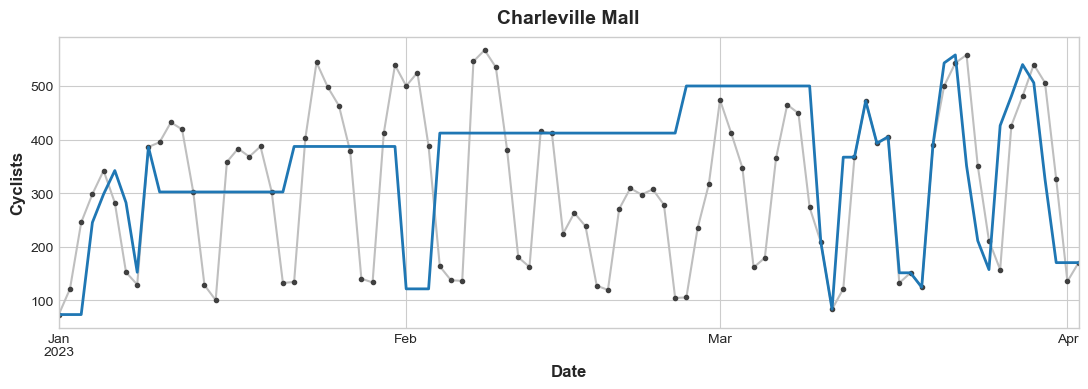

In [50]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=2)
ax.set_ylabel('Cyclists', fontsize=12)
ax.set_title('Charleville Mall');